## Generating MPEA SQS using icet

In [13]:
# Start from a primitive lattice

from ase.build import bulk

prim = bulk('Ni')
print(prim)

Atoms(symbols='Ni', pbc=True, cell=[[0.0, 1.76, 1.76], [1.76, 0.0, 1.76], [1.76, 1.76, 0.0]])


In [14]:
import numpy as np
from ase.build import make_supercell

sc = make_supercell(prim, P=np.eye(3)*2)

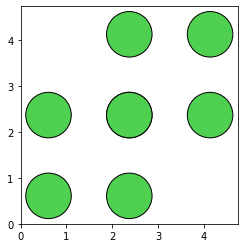

In [15]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plot_atoms(sc, ax=ax, radii=0.4)

In [16]:
# MPEA target composition (harder to find SQS as `x` -> 0!)

mpea_elements = ['Ni', 'Co', 'Cr']
target_concentrations = dict([(elem, 1/len(mpea_elements)) for elem in mpea_elements])
print(target_concentrations)

{'Ni': 0.3333333333333333, 'Co': 0.3333333333333333, 'Cr': 0.3333333333333333}


In [17]:
# Set up the `icet.ClusterSpace` object
# Ångqvist, Mattias, et al. "icet–A Python library for constructing and sampling alloy cluster expansions."
# Advanced Theory and Simulations 2.7 (2019): 1900015. doi: https://doi.org/10.1002/adts.201900015

from icet import ClusterSpace

cs = ClusterSpace(
    structure=prim,                  # underlying lattice sites
    cutoffs=[7.2, 3.6],              # cutoffs to generate clusters (used to calculate correlations)
    chemical_symbols=mpea_elements,  # elements to mix on the lattice (nested lists for sublattices)
)
print(cs)

====================================== Cluster Space =======================================
 space group                            : Fm-3m (225)
 chemical species                       : ['Co', 'Cr', 'Ni'] (sublattice A)
 cutoffs                                : 7.2000 3.6000
 total number of parameters             : 37
 number of parameters by order          : 0= 1  1= 2  2= 24  3= 10
 fractional_position_tolerance          : 2e-06
 position_tolerance                     : 1e-05
 symprec                                : 1e-05
--------------------------------------------------------------------------------------------
index | order |  radius  | multiplicity | orbit_index | multi_component_vector | sublattices
--------------------------------------------------------------------------------------------
   0  |   0   |   0.0000 |        1     |      -1     |           .            |      .     
   1  |   1   |   0.0000 |        1     |       0     |          [0]           |      A     


In [18]:
# Size of the supercell to generate (larger better but compute cost tradeoffs)
# NB: Number of sites available in supercell should be commensurate with composition

max_atoms_in_sc = 9

In [20]:
# Generate SQS!
# For smaller supercells (<10-20 atoms), finding SQS by enumeration is usually faster

from icet.tools.structure_generation import generate_sqs_by_enumeration

sqs_enum = generate_sqs_by_enumeration(
    cluster_space=cs,
    include_smaller_cells=False,
    max_size=max_atoms_in_sc,
    target_concentrations=target_concentrations,
)

Cluster vector of generated structure: [ 1.00000000e+00  7.40148683e-17 -1.48029737e-16 -4.11193713e-18
  0.00000000e+00  1.64477485e-17 -4.11193713e-18  0.00000000e+00
  1.64477485e-17 -6.25000000e-02 -1.64477485e-17 -6.25000000e-02
 -4.11193713e-18  0.00000000e+00  1.64477485e-17 -4.11193713e-18
  0.00000000e+00  1.64477485e-17 -6.25000000e-02 -2.46716228e-17
 -6.25000000e-02 -4.11193713e-18  0.00000000e+00  1.64477485e-17
 -4.11193713e-18  0.00000000e+00  1.64477485e-17  3.12500000e-02
 -2.00456935e-17 -3.12500000e-02  1.23358114e-17  2.05596856e-18
 -2.05596856e-18  6.16790569e-18 -4.11193713e-18 -6.16790569e-18
 -4.11193713e-18]


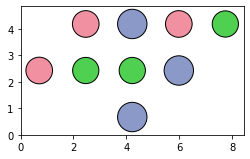

In [21]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plot_atoms(sqs_enum, ax=ax, radii=0.4)
print(f'Cluster vector of generated structure: {cs.get_cluster_vector(sqs_enum)}')

In [22]:
# The default algo uses simulated annealing, optimizing a "close-to-random" fitness function
# Van de Walle, A., et al. "Efficient stochastic generation of special quasirandom structures."
# Calphad 42 (2013): 13-18. doi: https://doi.org/10.1016/j.calphad.2013.06.006

from icet.tools.structure_generation import generate_sqs

sqs = generate_sqs(
    cluster_space=cs,
    include_smaller_cells=False,
    max_size=max_atoms_in_sc,
    target_concentrations=target_concentrations,
)

Cluster vector of generated structure: [ 1.00000000e+00  7.40148683e-17 -1.48029737e-16 -4.11193713e-18
  0.00000000e+00  1.64477485e-17 -4.11193713e-18  0.00000000e+00
  1.64477485e-17 -6.25000000e-02 -2.05596856e-17 -6.25000000e-02
 -4.11193713e-18  0.00000000e+00  1.64477485e-17 -4.11193713e-18
  0.00000000e+00  1.64477485e-17 -6.25000000e-02 -6.16790569e-18
 -6.25000000e-02 -4.11193713e-18  0.00000000e+00  1.64477485e-17
 -4.11193713e-18  0.00000000e+00  1.64477485e-17  3.12500000e-02
 -2.00456935e-17 -3.12500000e-02  9.25185854e-18  2.05596856e-18
  0.00000000e+00  5.13992141e-18  0.00000000e+00 -6.16790569e-18
  4.11193713e-18]


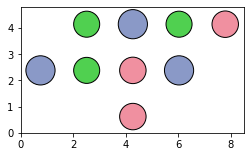

In [23]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plot_atoms(sqs, ax=ax, radii=0.4)
print(f'Cluster vector of generated structure: {cs.get_cluster_vector(sqs)}')